# Simple Linear Regression

## Fuel consumption ratings - Canada

### Data Preprocessing

#### It is a data mining technique that transforms raw data into an understandable format. Raw data(real world data) is always incomplete and that data cannot be sent through a model. That would cause certain errors. That is why we need to preprocess data before sending through a model.

Steps in Data Preprocessing These are the steps:

    Import libraries
    Import dataset
    Finding for missing values
    Encoding categorical data
    Data splitting
    Feature Scaling

In [1]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Documentation
import handcalcs.render

# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # color map
import seaborn as sns

from sympy import Sum, symbols, Indexed, lambdify, diff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Path
data_path = './Data/'

In [3]:
raw_fuel_consumption = pd.read_csv(data_path+"MY2022 Fuel Consumption Ratings.csv", encoding='cp1252', sep=',', dtype='unicode',  low_memory=False, index_col=0).reset_index()
raw_fuel_consumption.shape

(6681, 222)

In [4]:
raw_fuel_consumption

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,...,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_fuel_consumption = raw_fuel_consumption.iloc[:,0:14]
raw_fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Model             964 non-null    object
 1   Make              976 non-null    object
 2   Model.1           955 non-null    object
 3   Vehicle Class     955 non-null    object
 4   Engine Size       956 non-null    object
 5   Cylinders         955 non-null    object
 6   Transmission      955 non-null    object
 7   Fuel              956 non-null    object
 8   Fuel Consumption  956 non-null    object
 9   Unnamed: 9        956 non-null    object
 10  Unnamed: 10       956 non-null    object
 11  Unnamed: 11       956 non-null    object
 12  CO2 Emissions     956 non-null    object
 13  CO2               956 non-null    object
dtypes: object(14)
memory usage: 730.9+ KB


In [6]:
raw_fuel_consumption[0:956]

,Model,Make,Model.1,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2 Emissions,CO2
0,Year,NaN,NaN,NaN,(L),NaN,NaN,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating
1,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5
952,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5
953,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5
954,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5


In [7]:
raw_fuel_consumption.columns

Index(['Model', 'Make', 'Model.1', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'CO2 Emissions', 'CO2'],
      dtype='object')

In [8]:
raw_fuel_consumption_description = raw_fuel_consumption[957:][0:22].iloc[:,0:2].rename(columns={'Model':'Name', 'Make':'Description'})
raw_fuel_consumption_description.reset_index(inplace = True, drop = True)

In [9]:
raw_fuel_consumption_description

,Name,Description
0,Understanding the table,NaN
1,Model,4WD/4X4 = Four-wheel drive
2,NaN,AWD = All-wheel drive
3,NaN,FFV = Flexible-fuel vehicle
4,NaN,SWB = Short wheelbase
5,NaN,LWB = Long wheelbase
6,NaN,EWB = Extended wheelbase
7,Transmission,A = automatic
8,NaN,AM = automated manual
9,NaN,AS = automatic with select shift


In [10]:
columns_lis = []
for i in raw_fuel_consumption.columns:
    if str(raw_fuel_consumption[i][0]) != 'nan':
        if 'Unnamed' in str(i):
            columns_lis.append(str(raw_fuel_consumption[i][0]))
        else:
            columns_lis.append(i + str(raw_fuel_consumption[i][0]))
    else:
        columns_lis.append(i)
        
raw_fuel_consumption.columns = columns_lis

In [11]:
fuel_consumption = raw_fuel_consumption[1:956]

In [12]:
fuel_consumption

,ModelYear,Make,Model.1,Vehicle Class,Engine Size(L),Cylinders,Transmission,FuelType,Fuel ConsumptionCity (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions(g/km),CO2Rating
1,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6
2,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4
3,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5
4,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5
5,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5
952,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5
953,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5
954,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5


In [13]:
fuel_consumption = fuel_consumption.rename(columns={'Model.1' :'Mode'})

In [14]:
fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 1 to 955
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ModelYear                        955 non-null    object
 1   Make                             955 non-null    object
 2   Mode                             955 non-null    object
 3   Vehicle Class                    955 non-null    object
 4   Engine Size(L)                   955 non-null    object
 5   Cylinders                        955 non-null    object
 6   Transmission                     955 non-null    object
 7   FuelType                         955 non-null    object
 8   Fuel ConsumptionCity (L/100 km)  955 non-null    object
 9   Hwy (L/100 km)                   955 non-null    object
 10  Comb (L/100 km)                  955 non-null    object
 11  Comb (mpg)                       955 non-null    object
 12  CO2 Emissions(g/km)              955

In [15]:
fuel_consumption['ModelYear'] = fuel_consumption['ModelYear'].astype(int)
fuel_consumption['Make'] = fuel_consumption['Make'].astype(str)
fuel_consumption['Mode'] = fuel_consumption['Mode'].astype(str)
fuel_consumption['Vehicle Class'] = fuel_consumption['Vehicle Class'].astype(str)
fuel_consumption['Engine Size(L)'] = fuel_consumption['Engine Size(L)'].astype(float)
fuel_consumption['Cylinders'] = fuel_consumption['Cylinders'].astype(int)
fuel_consumption['Transmission'] = fuel_consumption['Transmission'].astype(str)
fuel_consumption['FuelType'] = fuel_consumption['FuelType'].astype(str)
fuel_consumption['Fuel ConsumptionCity (L/100 km)'] = fuel_consumption['Fuel ConsumptionCity (L/100 km)'].astype(float)
fuel_consumption['Hwy (L/100 km)'] = fuel_consumption['Hwy (L/100 km)'].astype(float)
fuel_consumption['Comb (L/100 km)'] = fuel_consumption['Comb (L/100 km)'].astype(float)
fuel_consumption['Comb (mpg)'] = fuel_consumption['Comb (mpg)'].astype(int)
fuel_consumption['CO2 Emissions(g/km)'] = fuel_consumption['CO2 Emissions(g/km)'].astype(int)
fuel_consumption['CO2Rating'] = fuel_consumption['CO2Rating'].astype(int)

In [16]:
fuel_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 1 to 955
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ModelYear                        955 non-null    int32  
 1   Make                             955 non-null    object 
 2   Mode                             955 non-null    object 
 3   Vehicle Class                    955 non-null    object 
 4   Engine Size(L)                   955 non-null    float64
 5   Cylinders                        955 non-null    int32  
 6   Transmission                     955 non-null    object 
 7   FuelType                         955 non-null    object 
 8   Fuel ConsumptionCity (L/100 km)  955 non-null    float64
 9   Hwy (L/100 km)                   955 non-null    float64
 10  Comb (L/100 km)                  955 non-null    float64
 11  Comb (mpg)                       955 non-null    int32  
 12  CO2 Emissions(g/km)   

In [17]:
fuel_consumption.columns

Index(['ModelYear', 'Make', 'Mode', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'FuelType',
       'Fuel ConsumptionCity (L/100 km)', 'Hwy (L/100 km)', 'Comb (L/100 km)',
       'Comb (mpg)', 'CO2 Emissions(g/km)', 'CO2Rating'],
      dtype='object')

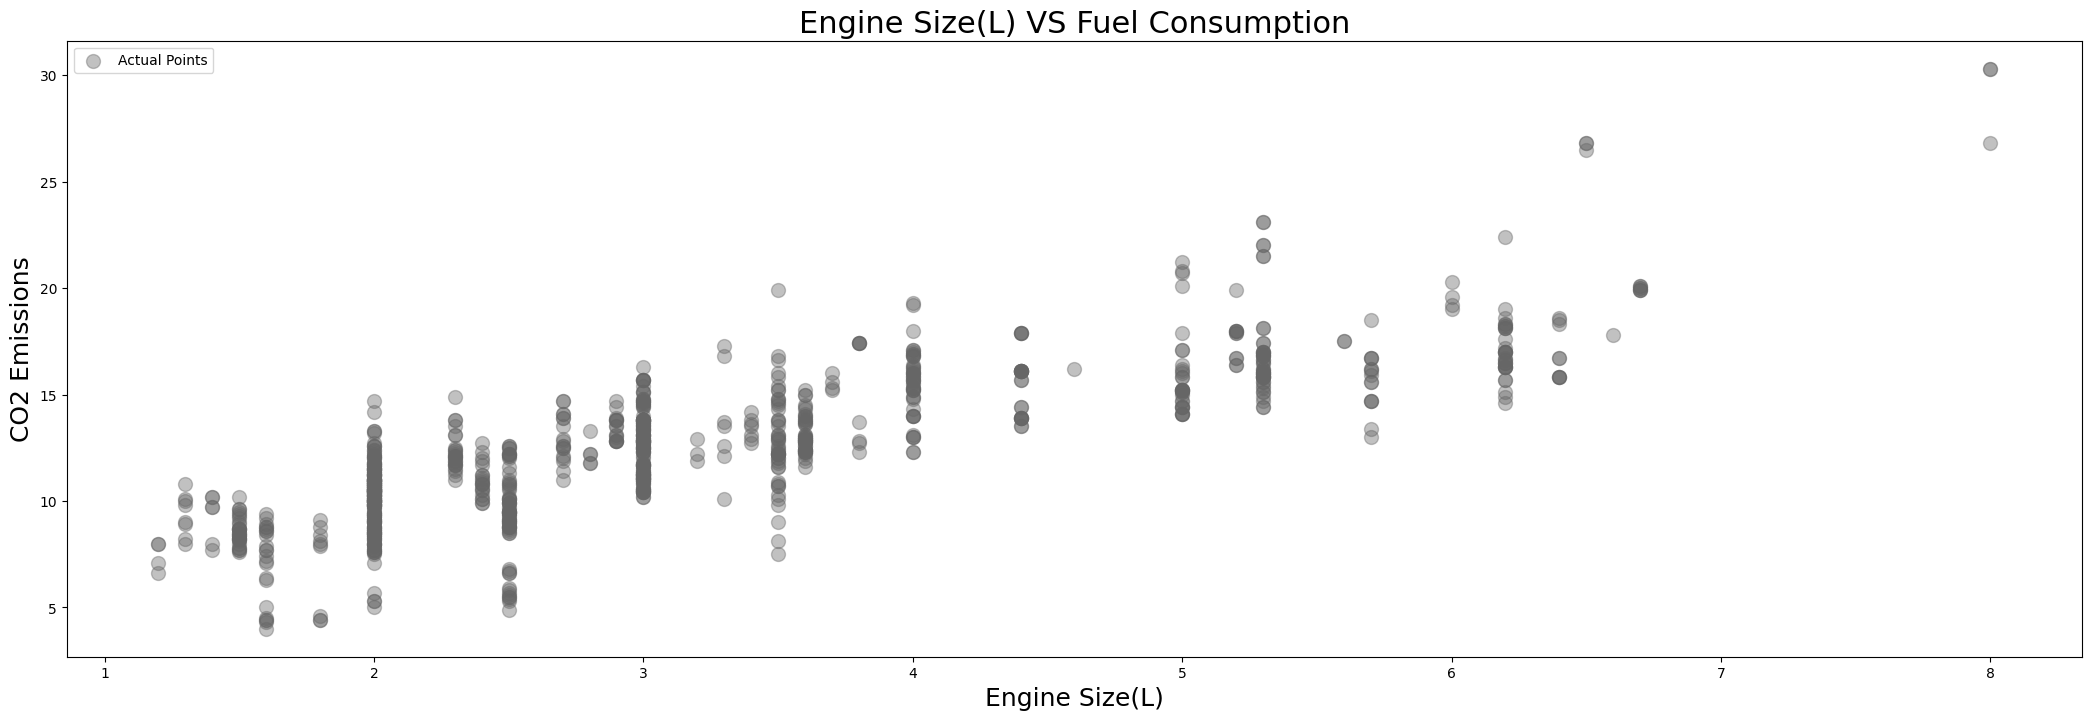

In [18]:
fig = plt.figure(figsize=[26, 8])
plt.scatter( fuel_consumption['Engine Size(L)'], fuel_consumption['Fuel ConsumptionCity (L/100 km)'], s=100, alpha = 0.4, color ='#666666', label = 'Actual Points')
plt.title('Engine Size(L) VS Fuel Consumption', fontsize = 22)
plt.xlabel('Engine Size(L)', fontsize = 18)
plt.ylabel('CO2 Emissions', fontsize = 18)
plt.legend()
plt.show()

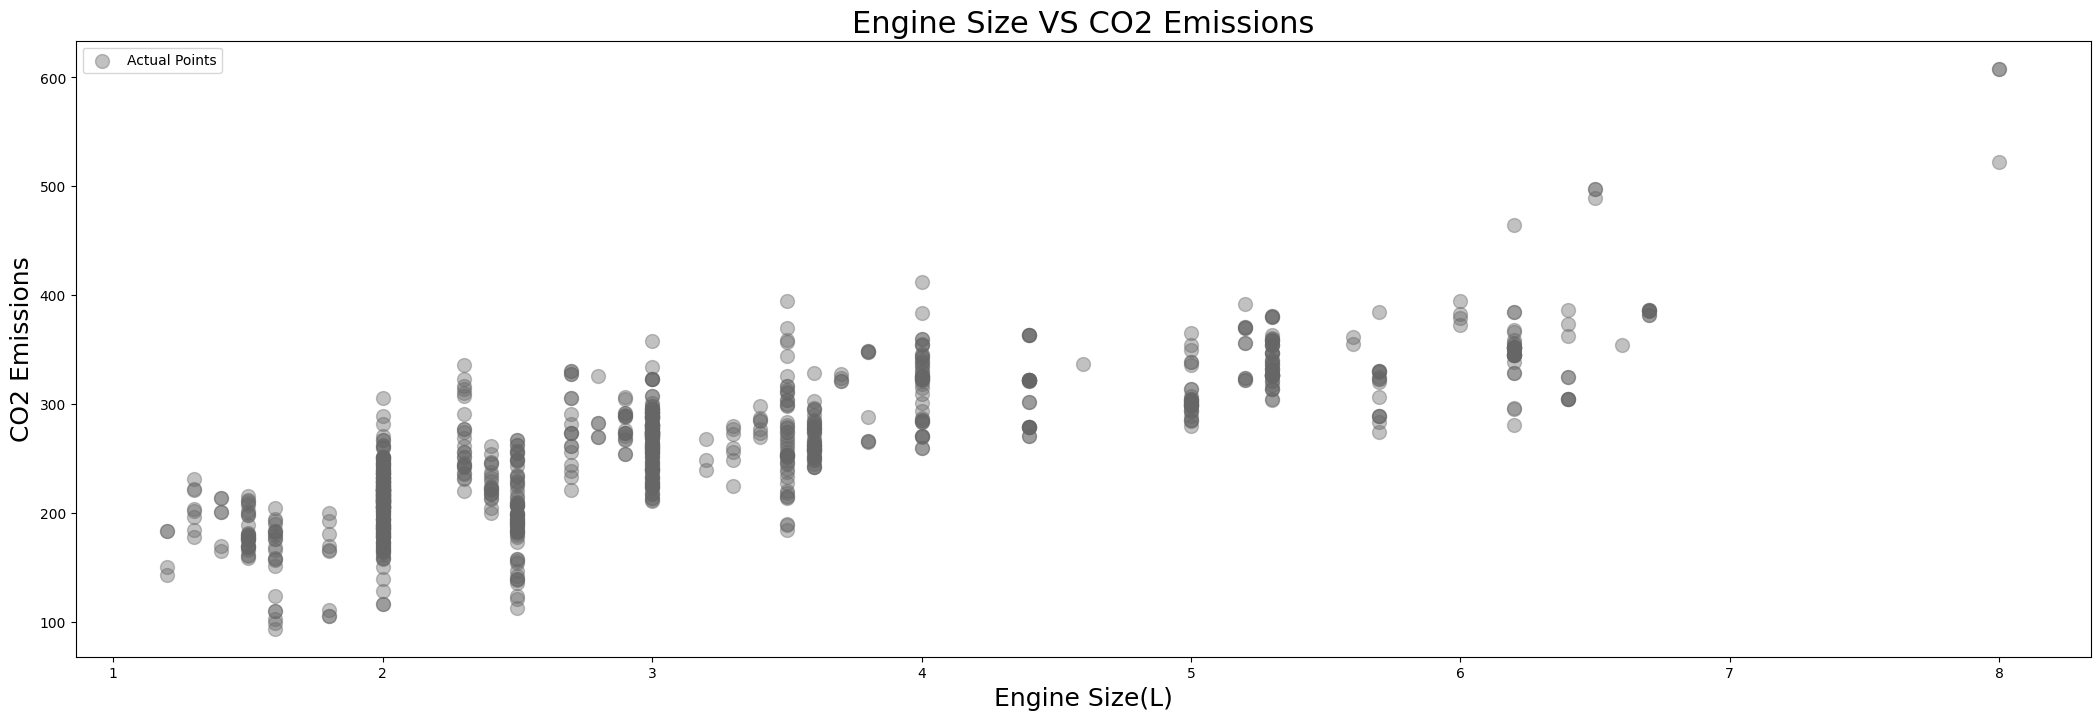

In [19]:
fig = plt.figure(figsize=[26, 8])
plt.scatter(fuel_consumption['Engine Size(L)'], fuel_consumption['CO2 Emissions(g/km)'], s=100, alpha = 0.4, color ='#666666', label = 'Actual Points')
plt.title('Engine Size VS CO2 Emissions', fontsize = 22)
plt.xlabel('Engine Size(L)', fontsize = 18)
plt.ylabel('CO2 Emissions', fontsize = 18)
plt.legend()
plt.show()

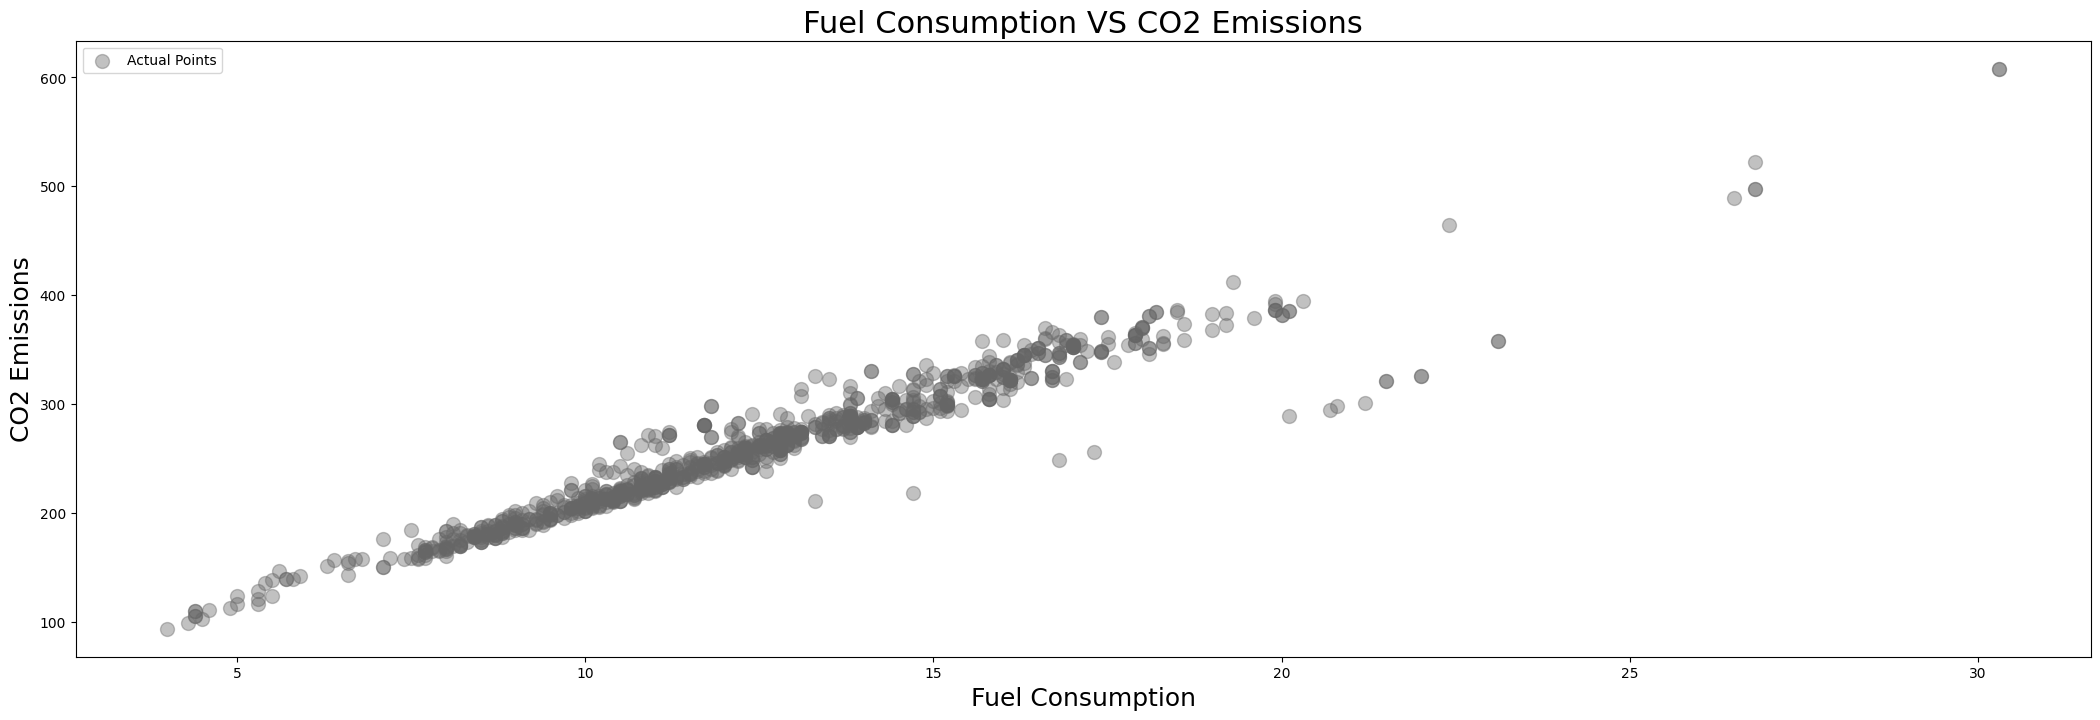

In [20]:
fig = plt.figure(figsize=[26, 8])
plt.scatter(fuel_consumption['Fuel ConsumptionCity (L/100 km)'], fuel_consumption['CO2 Emissions(g/km)'], s=100, alpha = 0.4, color ='#666666', label = 'Actual Points')
plt.title('Fuel Consumption VS CO2 Emissions', fontsize = 22)
plt.xlabel('Fuel Consumption', fontsize = 18)
plt.ylabel('CO2 Emissions', fontsize = 18)
plt.legend()
plt.show()

In [21]:
x = np.array(fuel_consumption['Fuel ConsumptionCity (L/100 km)']).reshape(-1,1)
y = np.array(fuel_consumption['CO2 Emissions(g/km)']).reshape(-1,1)

In [22]:
# train, test split......
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [23]:
print("X_train Size :",len(X_train))
print("Y_train Size :",len(y_train))
print("X_test Size :",len(X_test))
print("Y_test Size :",len(y_test))
print("Train Size :", (len(X_train)/len(x))*100)
print("Train Size :", (len(X_test)/len(x))*100)

X_train Size : 764
Y_train Size : 764
X_test Size : 191
Y_test Size : 191
Train Size : 80.0
Train Size : 20.0


In [29]:
fuel_consumption['Fuel ConsumptionCity (L/100 km)']

1       9.9
2      12.6
3      11.0
4      11.3
5      11.2
       ... 
951    10.7
952    10.5
953    11.0
954    11.5
955    12.4
Name: Fuel ConsumptionCity (L/100 km), Length: 955, dtype: float64

In [30]:
fuel_consumption['CO2 Emissions(g/km)']

1      200
2      263
3      232
4      242
5      230
      ... 
951    219
952    219
953    232
954    236
955    252
Name: CO2 Emissions(g/km), Length: 955, dtype: int32

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [32]:
c = regr.intercept_
c

array([34.88975211])

In [33]:
m = regr.coef_
m

array([[17.93545267]])

In [34]:
regr.score(X_train,y_train)

0.9271572465898162

In [36]:
y_pred = c + m * X_train

In [37]:
round(r2_score(y_train,y_pred),3)


0.927

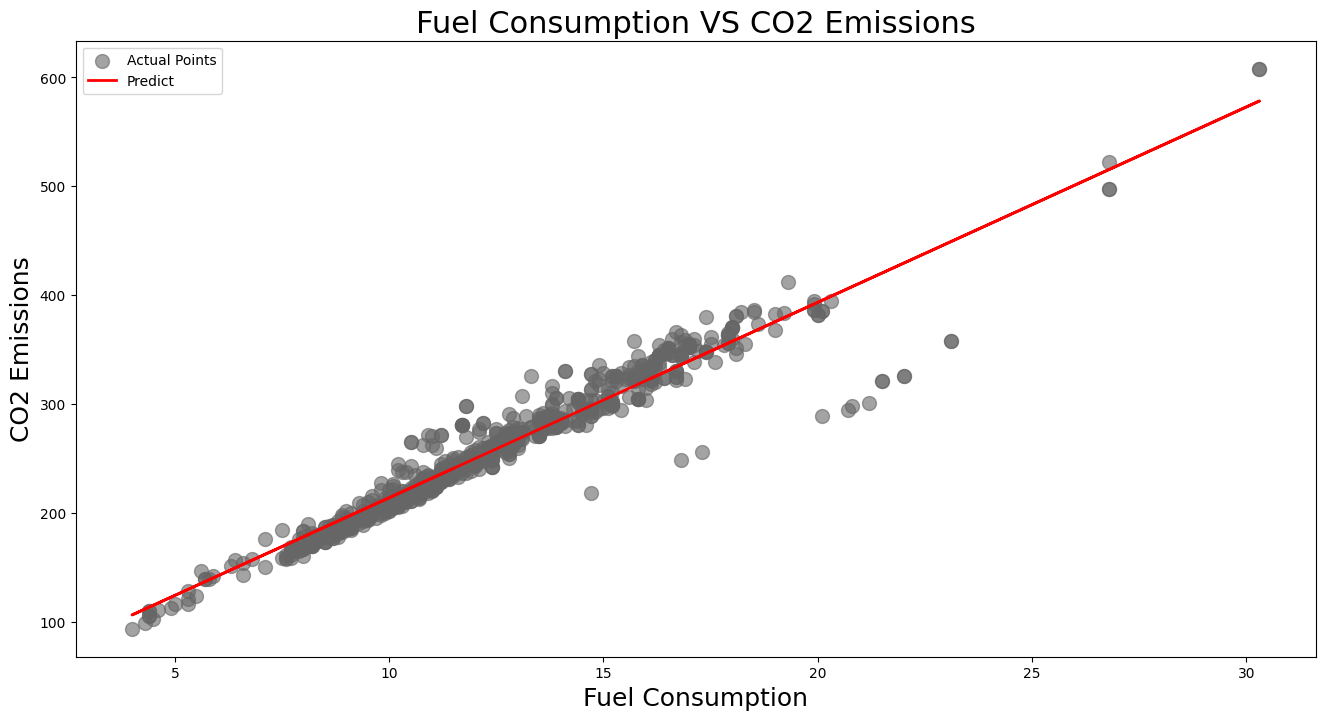

In [38]:
fig = plt.figure(figsize=[16, 8])
plt.scatter(X_train, y_train, s=100, alpha = 0.6, color ='#666666', label = 'Actual Points')
plt.plot(X_train, regr.predict(X_train), color='red', linewidth=2, label = 'Predict')
plt.title('Fuel Consumption VS CO2 Emissions', fontsize = 22)
plt.xlabel('Fuel Consumption', fontsize = 18)
plt.ylabel('CO2 Emissions', fontsize = 18)
plt.legend()
plt.show()

In [39]:
def mse(y_train, y_pred):
    size = len(X_train)
    mse_calc = 1/size * sum((y_train - y_pred)**2)
    return mse_calc
print('The directly calculated value of MSE is ', mse(y_train , y_pred))

The directly calculated value of MSE is  [310.63967904]


In [40]:
nr_thetas = 100
th_0 = np.linspace(start=-2, stop=12, num=nr_thetas)
th_1 = np.linspace(start=-7, stop=7, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [41]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_pred = plot_t0[i][j] + plot_t1[i][j]*X_train
        plot_cost[i][j] = mean_squared_error(y_train, y_pred)
        

print('value of plot_cost', plot_cost.min())

value of plot_cost 27498.614489528794


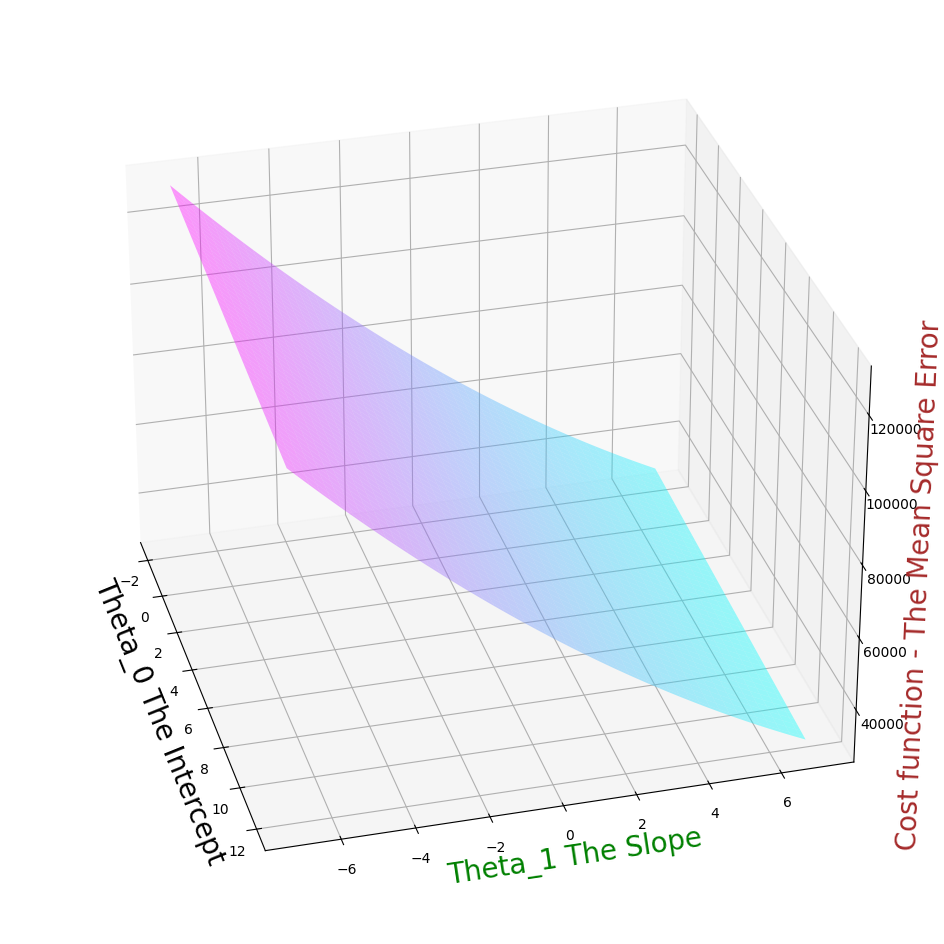

In [42]:
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Theta_0 The Intercept', fontsize=20, color ="black")
ax.set_ylabel('Theta_1 The Slope', fontsize=20, color ='green')
ax.set_zlabel('Cost function - The Mean Square Error', fontsize=20, color = 'brown')
ax.azim = -15
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.cool, alpha =0.4  )

plt.show()

In [43]:
print('Min value of plot_cost', plot_cost.min())# pulling out the lowest mean sqaure error from our surface plot.
# how to get the theta0 and theta1 values associated with that cost??
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape) # unravel_index function of np
print('Min occurs at (i,j):', ij_min) # row, col

Min value of plot_cost 27498.614489528794
Min occurs at (i,j): (99, 99)


In [44]:
def grad(x, y, thetas):
    n = y.size
    
    #Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])

In [45]:
multiplier = 0.001
thetas = np.array([6.9,6.9])

# Collecting data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_train, thetas[0] + thetas[1]*X_train)

for i in range(1000):
    thetas = thetas - multiplier * grad(X_train, y_train, thetas)
    
    # Appending the new values to  numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_train, thetas[0] + thetas[1]*X_train))

In [46]:
intercept = thetas[0]
slope     = thetas[1]

intercept, slope

(11.476127396425618, 19.664181725237086)

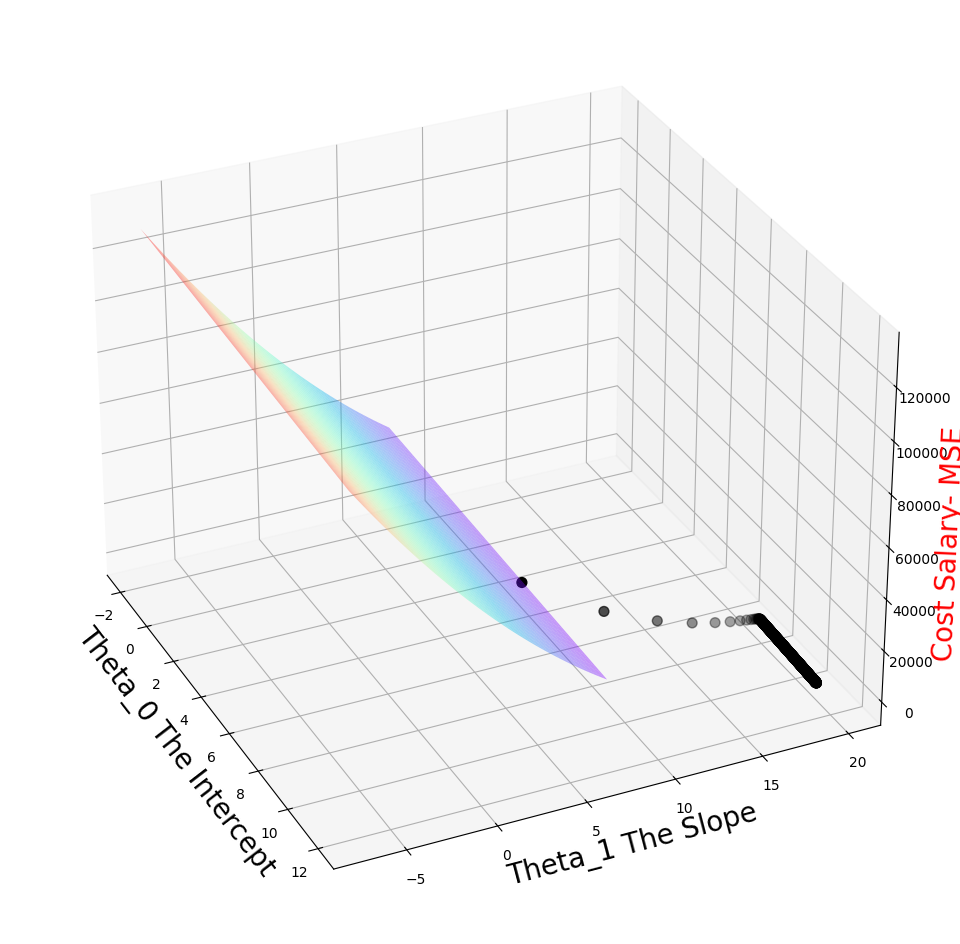

In [47]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Theta_0 The Intercept', fontsize=20, color ="black")
ax.set_ylabel('Theta_1 The Slope', fontsize=20, color ='black')
ax.set_zlabel('Cost Salary- MSE', fontsize=20, color ='red')
ax.azim = -25
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=50, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()
nr_thetas =0 # restting nr_thetas values to zero....so error will not be shown when the notebook is re-run

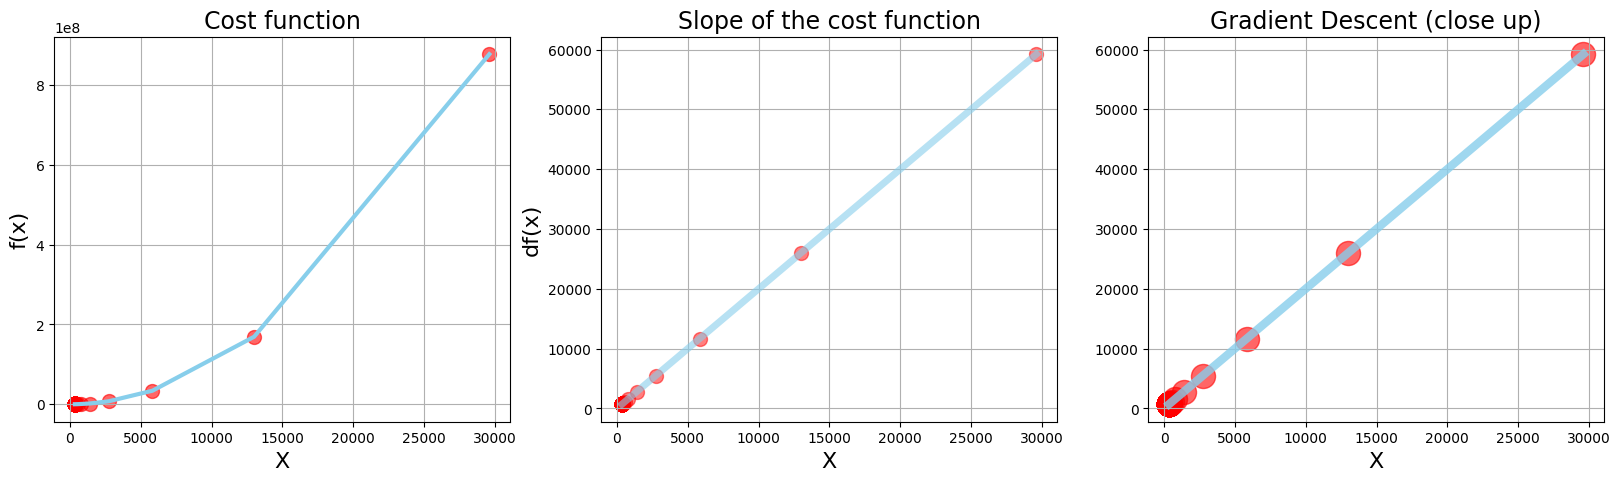

In [48]:
def f(x):
    return x**2 + x + 1
def df(x):
    return 2*x + 1
# Plotting MSE

# Three subplots 1. GD, 2 the GD on the Slope, 3 a close up
plt.figure(figsize=[20, 5])

#1
plt.subplot(1,3,1)


plt.grid()
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(mse_vals, f(mse_vals), color='skyblue', linewidth=3)

values = np.array(mse_vals)
plt.scatter(mse_vals, f(values), color='red', s=100, alpha=0.6)


#2
plt.subplot(1,3,2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()


plt.plot(mse_vals, df(mse_vals), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(mse_vals, df(mse_vals), color='red', s=100, alpha=0.5)


#3
plt.subplot(1,3,3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()


plt.plot(mse_vals, df(mse_vals), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(mse_vals, df(mse_vals), color='red', s=300, alpha=0.6)



plt.show()


In [49]:
y_train_opt = intercept + slope * X_train

In [50]:
round(r2_score(y_train, y_train_opt),3), regr.score(X_train, y_train), regr.score(X_train, y_train_opt)

(0.918, 0.9271572465898162, 0.9916773367709049)

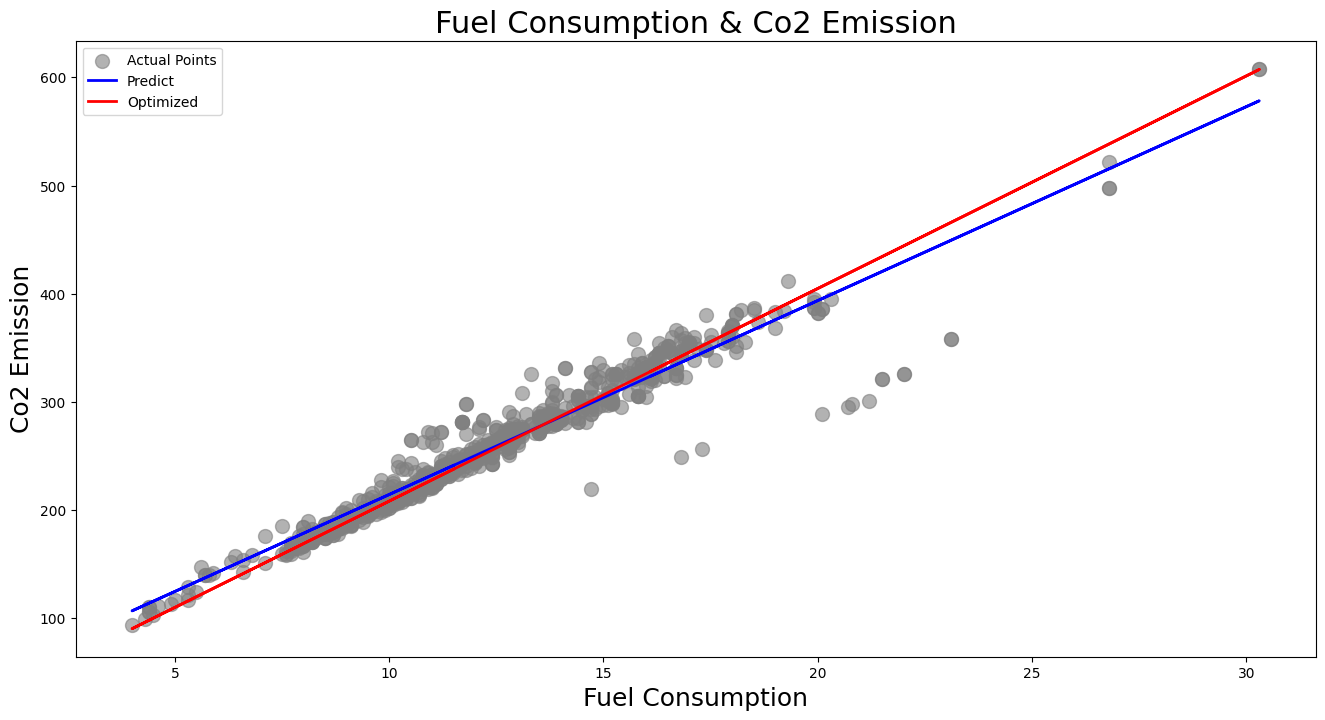

In [51]:
fig = plt.figure(figsize=[16, 8])
plt.scatter(X_train, y_train, s=100, alpha = 0.6, color ='grey',label = 'Actual Points')
plt.plot(X_train, regr.predict(X_train), color='blue', linewidth=2,  label = 'Predict')
plt.plot(X_train, y_train_opt, color='red', linewidth=2,  label = 'Optimized')
plt.title('Fuel Consumption & Co2 Emission', fontsize = 22)
plt.xlabel('Fuel Consumption', fontsize = 18)
plt.ylabel('Co2 Emission', fontsize = 18)
plt.legend()
plt.show()